# Tweet Sentiment Analysis

## Objective

- Create a machine learning model to perform sentiment analysis on tweets

## Import Relevant Libraries

In [1]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import re

## Load Data

In [117]:
tweets = pd.read_csv('tweets.csv',encoding='latin-1',names=['target','id','date','query','handle','tweet'],nrows=100)

## Data Cleaning

Initiate stopwords, stemmer, and lemmatizer instances and apply them on `text` column

In [118]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [119]:
tweets['tweet'] = tweets['tweet'].apply(lambda x: ' '.join([ps.stem(w).lower() for w in x.split()]))

In [120]:
tweets['tweet'] = tweets['tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

Remove puntuation

In [121]:
tweets['tweet'] = [re.sub(r'\W+', ' ', x) for x in tweets['tweet']]

Appending label columns

- `sentiment`: 1 for positive review (4 stars or more), 0 for negative review (less than 4 stars)
- `sentiment_multi`: 1 for positive review (4 stars or more), 0 for neutral review (3 stars), -1 for negative review (less than 3 stars)

In [122]:
tweets.head()

,target,id,date,query,handle,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot http twitpic com 2y1zl awww that a...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can t updat hi facebook by te...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dive mani time for the ball manag ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole bodi feel itchi and like it on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no it not behav at all i m ma...


## Data Visualization

Negative reviews

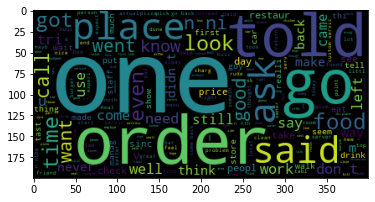

In [61]:
wordcloud = WordCloud().generate(''.join(tweets[tweets['target'] == 0]['tweet']))

plt.imshow(wordcloud);

Positive reviews

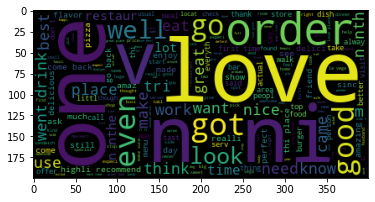

In [63]:
wordcloud = WordCloud().generate(''.join(tweets[tweets['target'] == 4]['tweet']))

plt.imshow(wordcloud);

## Machine Learning

Separate binary sentiment labels from text column and create training data

In [123]:
X = tweets['tweet']
y = tweets['target']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Bernoulli Naive Bayes Classifier - Binary Classification

In [125]:
bern_tfpipe = Pipeline([('tfid', TfidfVectorizer(ngram_range=(1, 1),max_features = 650,stop_words='english')), ('bernb', BernoulliNB())])

In [126]:
bern_tfpipe.fit(X_train,y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_features=650, stop_words='english')),
                ('bernb', BernoulliNB())])

In [127]:
y_pred = bern_tfpipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [135]:
phrase = ' '.join([ps.stem(word) for word in 'i hated this restaurant'.split()])

In [129]:
pipe.predict(['i hated this restaurant'])

array([0])

In [116]:
import pickle
pickle.dump(bern_tfpipe, open('bnb.pkl', 'wb'))

/Users/saifrahman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


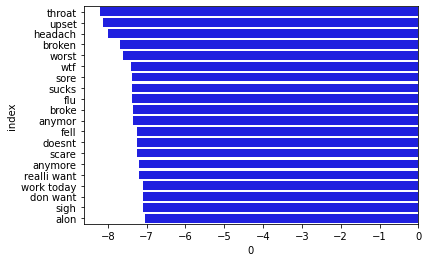

In [103]:
features = pd.DataFrame(bern_tfpipe['bernb'].coef_[0],index=bern_tfpipe['tfid'].get_feature_names()).reset_index().sort_values(by=0)
sns.barplot(data=features.head(20), x=0,y='index',color='blue');

## Dicussion

We tested both Naive Bayes classifiers on binary and multi labelled sentiment data. In both instances, Multinomial classification performs better than Bernoulli in all metrics. More specifically, Bernoulli struggled mightily with multi-class classification, which makes sense as it is typically used for binary data.

To improve the model, we should perform further validation, such as K-Fold, to measure the performance better. Additionally, more advanced data techniques should be used clean the text data. Finally, reviews with negation words such as 'This restaurant is not good' are tyically classified as positive reviews, thus advanced text vectorization needs to be applied to create a more accurate model. 